Lambda School Data Science

*Unit 4, Sprint 1, Module 2*

---

# Vector Representations (Prepare)


As we learned yesterday, machines cannot interpret raw text. We need to transform that text into something we/machines can more readily analyze. Yesterday, we did simple counts of counts to summarize the content of Amazon reviews. Today, we'll extend those concepts to talk about vector representations such as Bag of Words (BoW) and word embedding models. We'll use those representations for search, visualization, and prepare for our classification day tomorrow. 

Processing text data to prepare it for machine learning models often means translating the information from documents into a numerical format. Bag-of-Words approaches (sometimes referred to as Frequency-Based word embeddings) accomplish this by "vectorizing" tokenized documents. This is done by representing each document as a row in a DataFrame and creating a column for each unique word in the corpora (group of documents). The presence or lack of a given word in a document is then represented either as a raw count of how many times a given word appears in a document (CountVectorizer) or as that word's TF-IDF score (TfidfVectorizer).

On the python side, we will be focusing on `sklearn` and `spacy` today.  

## Case Study

We're going to pretend we're on the datascience team at the BBC. We want to recommend articles to visitors to on the BBC website based on the article they just read. Our team wants 

**Dataset:**

[D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.](http://mlg.ucd.ie/datasets/bbc.html)
*Please note that the dataset has been sampled down to tech articles only.* 

## Learning Objectives
* <a href="#p1">Part 1</a>: Represent a document as a vector
* <a href="#p2">Part 2</a>: Query Documents by Similarity
* <a href="#p3">Part 3</a>: Apply word embedding models to create document vectors

# Represent a document as a vector (Learn)
<a id="p1"></a>

## Overview

In this section, we are going to create Document Term Matrices (DTM). Each column represents a word. Each row represents a document. The value in each cell can be range of different things. The most traditional: counts of appearances of words, does the word appear at all (binary), and term-frequency inverse-document frequency (TF-IDF). 

**Discussion:** Don't we loose all the context and grammar if we do this? So Why does it work?

## Follow Along

In [1]:
""" Import Statements """

# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
nlp = spacy.load("en_core_web_lg")

**Warm Up (_3 Minutes_)**

Extract the tokens from this sentence using Spacy. Text is from [OpenAI](https://openai.com/blog/better-language-models/)

In [2]:
text = "We created a new dataset which emphasizes diversity of content, by scraping content from the Internet. In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma. This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."

In [3]:
doc = nlp(text)

print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['create', 'new', 'dataset', 'emphasize', 'diversity', 'content', 'scrape', 'content', 'internet', 'order', 'preserve', 'document', 'quality', 'page', 'curate', 'filter', 'human', 'specifically', 'outbound', 'link', 'Reddit', 'receive', '3', 'karma', 'think', 'heuristic', 'indicator', 'user', 'find', 'link', 'interesting', 'educational', 'funny', 'lead', 'high', 'datum', 'quality', 'similar', 'dataset', 'CommonCrawl']


In [3]:
# doc = nlp(text)

# def tokenize(test):
#     tokens = []
#     doc = nlp(text.strip())
#     for token in doc:
#         if token.is_stop == False & token.is_punct == False:
#             tokens.append(token.text.lower)
#     return tokens

In [7]:
import os 

def gather_data(filefolder):
    """ Produces List of Documents from a Directory
    
    filefolder (str): a path of .txt files
    
    returns list of strings 
    """
    
    data = []
    
    files = os.listdir(filefolder) # Causes variation across machines
    
    for article in files: 
        
        path = os.path.join(filefolder, article)
                    
        if  path[-3:] == 'txt': # os ~endswith('txt')
            with open(path, 'rb') as f:
                data.append(f.read())
    
    return data

In [8]:
data = gather_data('./data')

In [9]:
data[0]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain\'s first mobile phone call was made across the Vodafone network on 1 January 1985 by veteran comedian Ernie Wise. In the 20 years since that day, mobile phones have become an integral part of modern life and now almost 90% of Britons own a handset. Mobiles have become so popular that many people use their handset as their only phone and rarely use a landline.\n\nThe first ever call over a portable phone was made in 1973 in New York but it took 10 years for the first commercial mobile service to be launched. The UK was not far behind the rest of the world in setting up networks in 1985 that let people make calls while they walked. The first call was made from St Katherine\'s dock to Vodafone\'s head office in Newbury which at the time was over a curry house. For the first nine days of 1985 Vodafone was the only firm with a mobile network in the UK. Then on 10 Janu

### CountVectorizer

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = ["We created a new dataset which emphasizes diversity of content, by scraping content from the Internet."," In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma."," This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl."]

# create the transformer
vect = CountVectorizer()

# build vocab
vect.fit(text)

# transform text - will produce a matrix
dtm = vect.transform(text)

# Create a Vocabulary
# The vocabulary establishes all of the possible words that we might use.

# The vocabulary dictionary does not represent the counts of words!!


In [11]:
dtm

<3x61 sparse matrix of type '<class 'numpy.int64'>'
	with 69 stored elements in Compressed Sparse Row format>

In [12]:
print(dtm) #> the tuples tell us the location of a word, and then the count

  (0, 4)	1
  (0, 7)	2
  (0, 8)	1
  (0, 11)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (0, 29)	1
  (0, 35)	1
  (0, 36)	1
  (0, 47)	1
  (0, 52)	1
  (0, 58)	1
  (0, 60)	1
  (1, 1)	1
  (1, 3)	1
  (1, 4)	1
  (1, 9)	1
  (1, 14)	1
  (1, 17)	1
  (1, 20)	1
  (1, 22)	1
  (1, 25)	1
  (1, 26)	1
  (1, 30)	1
  :	:
  (2, 10)	1
  (2, 12)	1
  (2, 15)	1
  (2, 18)	1
  (2, 19)	1
  (2, 21)	1
  (2, 23)	1
  (2, 24)	1
  (2, 27)	1
  (2, 28)	1
  (2, 31)	1
  (2, 33)	1
  (2, 36)	1
  (2, 38)	1
  (2, 40)	2
  (2, 44)	1
  (2, 48)	1
  (2, 50)	1
  (2, 51)	1
  (2, 52)	1
  (2, 53)	1
  (2, 54)	1
  (2, 55)	1
  (2, 57)	1
  (2, 59)	2


In [13]:
print(dtm.todense()) #> this command gets it to familiar matrix representation

[[0 0 0 0 1 0 0 2 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
  1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0
  0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 2 0 2 0 2]
 [2 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0
  1 0 1 0 2 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 2 0]]


In [15]:
type(dtm.todense())

numpy.matrixlib.defmatrix.matrix

In [14]:
print(vect.get_feature_names())

['as', 'at', 'be', 'been', 'by', 'can', 'commoncrawl', 'content', 'created', 'curated', 'data', 'dataset', 'datasets', 'diversity', 'document', 'educational', 'emphasizes', 'filtered', 'for', 'found', 'from', 'funny', 'have', 'heuristic', 'higher', 'humans', 'in', 'indicator', 'interesting', 'internet', 'karma', 'leading', 'least', 'link', 'links', 'new', 'of', 'only', 'or', 'order', 'other', 'outbound', 'pages', 'preserve', 'quality', 'received', 'reddit', 'scraping', 'similar', 'specifically', 'such', 'than', 'the', 'this', 'thought', 'to', 'used', 'users', 'we', 'whether', 'which']


In [11]:
text[:25]

['We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.',
 ' In order to preserve document quality, we used only pages which have been curated/filtered by humans—specifically, we used outbound links from Reddit which received at least 3 karma.',
 ' This can be thought of as a heuristic indicator for whether other users found the link interesting (whether educational or funny), leading to higher data quality than other similar datasets, such as CommonCrawl.']

In [15]:
type(dtm)

scipy.sparse.csr.csr_matrix

In [10]:
# Dealing with Sparse Matrix
dtm.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2],
        [2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
         1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0,
         0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0]])

In [12]:
type(dtm)

pandas.core.frame.DataFrame

In [17]:
text[0]

'We created a new dataset which emphasizes diversity of content, by scraping content from the Internet.'

In [16]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm

as  at  be  been  by  can  commoncrawl  content  created  curated  ...  \
0   0   0   0     0   1    0            0        2        1        0  ...   
1   0   1   0     1   1    0            0        0        0        1  ...   
2   2   0   1     0   0    1            1        0        0        0  ...   

   than  the  this  thought  to  used  users  we  whether  which  
0     0    1     0        0   0     0      0   1        0      1  
1     0    0     0        0   1     2      0   2        0      2  
2     1    1     1        1   1     0      1   0        2      0  

[3 rows x 61 columns]

In [ ]:
data[0][:25]

In [15]:
len(data)

401

**Three Minute Challenge:** 
* Apply CountVectorizer to our BBC Data
* Store results in a dataframe called `dtm`
* Extra Challenge - Try to Customize CountVectorizer with Spacy Processing

In [22]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', 
                       max_df=.95, 
                       min_df=2, #> word must appear n times to appear in vocab
                       ngram_range=(1,2),
                       max_features=5000 #> max n of features we want to return in vector)
                      )

#Learn our Vocab
vect.fit(data)

# Get sparse dtm
dtm = vect.transform(data)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [23]:
print(f"Number of Features (ngrams): {dtm.shape[1]}")

Number of Features (ngrams): 5000


In [24]:
dtm.head()

000  000 000  000 new  000 people  000 times  10  10 000  10 million  \
0    1        0        0           0          0   2       0           0   
1    0        0        0           0          0   0       0           0   
2    3        0        0           0          0   0       0           0   
3    0        0        0           0          0   0       0           0   
4    0        0        0           0          0   0       0           0   

   10 times  10 years  ...  yes  york  young  young people  younger  youth  \
0         0         1  ...    0     1      1             0        0      0   
1         0         0  ...    0     0      0             0        0      0   
2         0         0  ...    0     0      0             0        0      0   
3         0         0  ...    0     0      0             0        0      0   
4         0         0  ...    0     0      0             0        0      0   

   zafi  zafi virus  zen  zombies  
0     0           0    0        0  
1     0           0    0        0  
2     0           0    0        0  
3     0           0    0        0  
4     0           0    0        0  

[5 rows x 5000 columns]

In [25]:
row = dtm.mean(axis=1)

In [26]:
row #> means are so low bc most of the information in bag of words is zeros

0      0.0446
1      0.0270
2      0.0584
3      0.0324
4      0.0498
        ...  
396    0.0472
397    0.0276
398    0.0360
399    0.0394
400    0.0186
Length: 401, dtype: float64

In [27]:
doc_len = [len(doc) for doc in data]

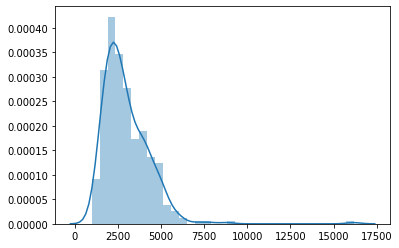

In [28]:
import seaborn as sns

sns.distplot(doc_len);

# If documents are of variable length, we need something more
# than count vectorization

### TfidfVectorizer

## Term Frequency - Inverse Document Frequency (TF-IDF)

<center><img src="https://mungingdata.files.wordpress.com/2017/11/equation.png?w=430&h=336" width="300"></center>

Term Frequency: Percentage of words in document for each word

Document Frequency: A penalty for the word existing in a high number of documents.

The purpose of TF-IDF is to find what is **unique** to each document. Because of this we will penalize the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

In [ ]:
# TF-IDF finds whats unique to most documents and penalizes what is common

# It does this by taking the count of a term in a document and dividing by the 
# count of total terms in that document

# Ultimately it controls for what is unique in a given document

# Also normalizes all scores between 0 and 1, so essentially a scaling effect

# Scores closer to 1 is more unique, and closer to 0 is more common

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1,3))

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(data)

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

000  000 new  000 people  000 times        10  10 000  10 million  \
0  0.027615      0.0         0.0        0.0  0.063597     0.0         0.0   
1  0.000000      0.0         0.0        0.0  0.000000     0.0         0.0   
2  0.061334      0.0         0.0        0.0  0.000000     0.0         0.0   
3  0.000000      0.0         0.0        0.0  0.000000     0.0         0.0   
4  0.000000      0.0         0.0        0.0  0.000000     0.0         0.0   

   10 times  10 years  100  ...  yoran      york     young  young people  \
0       0.0  0.064011  0.0  ...    0.0  0.052751  0.055828           0.0   
1       0.0  0.000000  0.0  ...    0.0  0.000000  0.000000           0.0   
2       0.0  0.000000  0.0  ...    0.0  0.000000  0.000000           0.0   
3       0.0  0.000000  0.0  ...    0.0  0.000000  0.000000           0.0   
4       0.0  0.000000  0.0  ...    0.0  0.000000  0.000000           0.0   

   younger  youth  zafi  zafi virus  zen  zombies  
0      0.0    0.0   0.0         0.0  0.0      0.0  
1      0.0    0.0   0.0         0.0  0.0      0.0  
2      0.0    0.0   0.0         0.0  0.0      0.0  
3      0.0    0.0   0.0         0.0  0.0      0.0  
4      0.0    0.0   0.0         0.0  0.0      0.0  

[5 rows x 5000 columns]

In [30]:
dtm.max(axis=1).max()

0.7812642935875962

In [31]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

text data machines

"text data" "data machines" "text machines"

In [34]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(ngram_range=(1,3),
                        max_df=.97,
                        min_df=2,
                        tokenizer=tokenize, 
                        max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

10     2004    accord   add   apple   bbc   big   bill   bill thompson  \
0  0.0  0.00000  0.000000   0.0     0.0   0.0   0.0    0.0             0.0   
1  0.0  0.09171  0.080469   0.0     0.0   0.0   0.0    0.0             0.0   
2  0.0  0.00000  0.000000   0.0     0.0   0.0   0.0    0.0             0.0   
3  0.0  0.00000  0.000000   0.0     0.0   0.0   0.0    0.0             0.0   
4  0.0  0.00000  0.000000   0.0     0.0   0.0   0.0    0.0             0.0   

    britain  ...  young people  youth  zafi  zen  zombie  zone  zoom  \
0  0.065035  ...           0.0    0.0   0.0  0.0     0.0   0.0   0.0   
1  0.000000  ...           0.0    0.0   0.0  0.0     0.0   0.0   0.0   
2  0.000000  ...           0.0    0.0   0.0  0.0     0.0   0.0   0.0   
3  0.000000  ...           0.0    0.0   0.0  0.0     0.0   0.0   0.0   
4  0.000000  ...           0.0    0.0   0.0  0.0     0.0   0.0   0.0   

          £  £ 20  £ 99  
0  0.030390   0.0   0.0  
1  0.000000   0.0   0.0  
2  0.042325   0.0   0.0  
3  0.000000   0.0   0.0  
4  0.000000   0.0   0.0  

[5 rows x 5000 columns]

In [35]:
dtm.shape

(401, 5000)

## Challenge

During this module's project assignment, you will transform data science job listings to vector representations for analysis downstream. 

# Query Documents by Similarity (Learn)
<a id="p2"></a>

## Overview

Have you ever considered how a search bar works? You may just think that search bars simply match your input text againist the documents. While there are many different mechanisms for the 'match', one of the most classic is to search by similarity. We will apply n-dimensional distance to measure similarity, and query for input and output. 

## Follow Along

### Cosine Similarity (Brute Force)

In [36]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [37]:
# Turn it into a DataFrame

df = pd.DataFrame(dist_matrix)

In [38]:
# Our Similarity Matrix is ? size 
df.shape #> comparing the similarity of all documents to all other documents

(401, 401)

In [42]:
data[0][:100]

b'Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this'

In [39]:
# Each row is the similarity of one document to all other documents (including itself)
df[0][:5]

0    1.000000
1    0.072930
2    0.034021
3    0.008529
4    0.070520
Name: 0, dtype: float64

In [42]:
# Grab the row
df[df[0] < .99][0].sort_values(ascending=False)[:5]

92     0.376695
297    0.353753
300    0.298214
187    0.284322
309    0.278114
Name: 0, dtype: float64

In [38]:
print(data[0][:150])

b"Mobiles rack up 20 years of use\n\nMobile phones in the UK are celebrating their 20th anniversary this weekend.\n\nBritain's first mobile phone call was m"


In [43]:
print(data[92][:150])

b'Finding new homes for old phones\n\nRe-using old mobile phones is not just good for the environment, it has social benefits too.\n\nResearch has found tha'


### NearestNeighbor (K-NN) 

To address the computational inefficiencies of the brute-force approach, a variety of tree-based data structures have been invented. In general, these structures attempt to reduce the required number of distance calculations by efficiently encoding aggregate distance information for the sample. The basic idea is that if point  is very distant from point , and point  is very close to point , then we know that points  and  are very distant, without having to explicitly calculate their distance. In this way, the computational cost of a nearest neighbors search can be reduced to  or better. This is a significant improvement over brute-force for large data.

To address the inefficiencies of KD Trees in higher dimensions, the ball tree data structure was developed. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.

A ball tree recursively divides the data into nodes defined by a centroid  and radius , such that each point in the node lies within the hyper-sphere defined by  and . The number of candidate points for a neighbor search is reduced through use of the triangle inequality:

With this setup, a single distance calculation between a test point and the centroid is sufficient to determine a lower and upper bound on the distance to all points within the node. Because of the spherical geometry of the ball tree nodes, it can out-perform a KD-tree in high dimensions, though the actual performance is highly dependent on the structure of the training data. In scikit-learn, ball-tree-based neighbors searches are specified using the keyword algorithm = 'ball_tree', and are computed using the class sklearn.neighbors.BallTree. Alternatively, the user can work with the BallTree class directly.

In [49]:
dtm.head()

000        10  100  101  104  10m        11   12  120   13  ...  yoda  \
0  0.028940  0.066646  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   0.0   
1  0.000000  0.000000  0.0  0.0  0.0  0.0  0.077901  0.0  0.0  0.0  ...   0.0   
2  0.061896  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   0.0   
3  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   0.0   
4  0.000000  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   0.0   

   yoran     york     young  younger  youngsters  youth  zafi  zen  zombies  
0    0.0  0.05528  0.058505      0.0         0.0    0.0   0.0  0.0      0.0  
1    0.0  0.00000  0.000000      0.0         0.0    0.0   0.0  0.0      0.0  
2    0.0  0.00000  0.000000      0.0         0.0    0.0   0.0  0.0      0.0  
3    0.0  0.00000  0.000000      0.0         0.0    0.0   0.0  0.0      0.0  
4    0.0  0.00000  0.000000      0.0         0.0    0.0   0.0  0.0      0.0  

[5 rows x 5000 columns]

In [45]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [46]:
nn.kneighbors([dtm.iloc[0].values]) #> notice we get docs 92, 297 and 300 again as similar

(array([[0.        , 0.        , 1.11651721, 1.13687866, 1.18472478]]),
 array([[  0,  62,  92, 297, 300]]))

In [47]:
nn.kneighbors([dtm.iloc[23].values])

(array([[0.        , 1.02227031, 1.02227031, 1.06470641, 1.06872115]]),
 array([[ 23, 323, 279, 352,  67]]))

In [48]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[323]])

(array([[0.        , 0.        , 1.00430583, 1.01904628, 1.02227031]]),
 array([[323, 279, 352,  67,  23]]))

In [49]:
data[23][:200]

b'Speech takes on search engines\n\nA Scottish firm is looking to attract web surfers with a search engine that reads out results.\n\nCalled Speegle, it has the look and feel of a normal search engine, with'

In [50]:
data[323][:200]

b'Savvy searchers fail to spot ads\n\nInternet search engine users are an odd mix of naive and sophisticated, suggests a report into search habits.\n\nThe report by the US Pew Research Center reveals that 8'

In [53]:
rndm_tech_article = [ """
Search has changed dramatically over the past year and semantic technology has been at the center of it all. Consumers increasingly expect search engines to understand natural language and perceive the intent behind the words they type in, and search engine algorithms are rising to this challenge. This evolution in search has dramatic implications for marketers, consumers, technology developers and content creators — and it’s still the early days for this rapidly changing environment. Here is an overview of how search technology is changing, how these changes may affect you and what you can do to market your business more effectively in the new era of search.

What Is Semantic Technology?

The word “semantic” refers to meaning. According to Search Engine Journal, semantic search (also known as “entity search”) “uses machine intelligence to determine the intended meaning of words so searches become more relevant.” Semantic technology has been gradually introduced in recent years, offering users easier access to the information and connections they’re seeking. Without even knowing it, consumers are using more natural speech in their search queries and they EXPECT to be understood. As Search Insider puts it, the goal is to “focus less on keywords and more on intent-based collective intelligence.”

No longer focused on just keywords or even phrases, Internet search has evolved to employ a new level of sophistication, the so-called semantic search engine. From now on, Internet surfers will be able to search based on “entities”; in simple terms, persons, places and things. These entity searches will reveal far more about the topic being researched than was possible before. For example, instead of just directing you to a prominent contemporary person you may be researching, Bing’s “Satori” will link you to any and all ”Talks” that person has delivered.

Google’s new “Hummingbird” algorithm allows the user to conduct what Google calls “conversational searches”. By this they mean that the search engine will take an entire sentence into account, not just the words in the sentence. So, instead of directing you to the nearest pizza restaurant, you’ll be directed to the nearest pizza restaurant that’s currently open, has the special ingredients you want and offers a promotion to new and returning customers, or whatever else you type into the search bar. The search engine strives to understand not just the words, but their context, hence the term semantic search.

The New World of Search Engines

Schema.org: Bing, Yahoo and Google recognize that in order to adapt to the new search landscape, they would have to put competition aside and engage in some collaboration. In 2011, they jointly launched the Schema.org initiative. Schema defines a new set of HTML terms which can be added to a web page’s markup. They will be used as clues to the meaning of that page, and will assist search engines to recognize specific people, events, attributes, and so on. For example, if a webpage contains the word “pentagon,” a Schema definition will clarify whether it’s about the geometric five-sided figure or the Department of Defense headquarters building.
Knowledge Graph and Snapshot: Google has been increasing the scope of its Knowledge Graph results, which offers users a box on the right hand side of the search results page that provides images and facts that are applicable to the searcher’s intent. Bing’s Snapshot, which functions similarly, was enhanced in 2013 by the advent of “Satori,” which will assist with understanding the relationship between people, places, events and objects.
Hummingbird: In September 2013, Google announced the arrival of Hummingbird, its new search algorithm. According to Google search chief Amit Singhal, Hummingbird represents the most drastic change in search algorithms that Google has made since 2001. He explains in Search Engine Land that Panda and Penguin were updates to the old algorithm, and some aspects of them will continue to apply, but Hummingbird is actually an entirely new search engine, designed for the search needs of today. Hummingbird offers a greatly increased comprehension of the meaning behind the search terms. Instead of just taking a few words from the query and trying to find pages with those words on them, Hummingbird is actually trying to decipher the meaning behind the query and offer results that match users’ intent. The Search Insider blog points out that Bing and Yahoo have made similar changes, though perhaps less drastic. They have geared their searches to respond more to full phrases and to understand the meaning contained in a string of words.
Rising Stars: With the advent of semantic search, an array of new search engines are being freshly constructed. Although their user numbers are microscopic when compared to the major search engines, these new players have the advantage of being able to make a fresh start without worrying about modifying earlier structures. Examples of natural language search engines include: Powerset (now owned by Microsoft), Hakia and a handful of others.
Applications for Semantic Search

Augmented Reality (AR): With Google Glass, an overlay (of a map, for instance) is layered on top of the landscape that is being physically seen by the viewer. This will lead to more image tagging and visually based searches. This has a natural tie-in to marketing, since shoppers will be able to look at something and then learn about it (and where to buy it) based on its appearance. However, Google Glass still faces some challenges: It uses a combination of image, facial and voice recognition technology, and that means that a continuous network connection is required because you can’t pack enough processing power into just a few ounces. However, this obstacle is likely to be overcome before too long, and wearable technology of all kinds is just over the horizon.
Search and Mobile: According to Search Insider, mobile search and the birth of Siri have been the biggest catalysts for consumers changing approach to search. Since Siri encourages natural language questions, and people have gotten accustomed to having immediate access to the information that they want, voice recognition technology is increasingly driving Search. The mobile search utility Google Now is powered by natural language, and fits into the user’s life by supplying them with the information they want before they even realize they want it. The expectation of this kind of responsiveness has circled back to text-based online searches, and all the major search engines have made adjustments to meet this demand.
Social Media and Semantic Technology: Facebook has announced that its new Graph Search is equipped with semantic search technology so that users can find the connections they want more easily, and advertisers can achieve more intuitive understanding of users’ preferences. Graph Search also enables far more accurate targeting of marketing, since it can make new connections. For example, a user (or advertiser) can find friends who like X who live in Y. Basically, the new technology provides a treasure trove for data mining, although it too has a few challenges to overcome. The new deeper data levels are based on people spending more time on Facebook, with broad networks of friends and connections. Also, the public concern with Facebook privacy continues and these concerns may prevent people from “Liking” certain things. Overall, however, the prospects are bright; Michael Pachter, an analyst at Wedbush Securities in Los Angeles, predicts in Bloomberg Businessweek, “Graph Search will grow to about a quarter of Facebook’s revenue, or $3 billion to $4 billion in 2015.”
What are the Implications for Marketers and Content Creators?

In their introduction to Hummingbird, Google states that the new algorithm doesn’t really usher in any SEO changes. SEO success will still depend on simply presenting original, high-quality content. However, the science of marketing is undergoing change in response to semantic search, because improved perception of user intent opens new doors. Users will have far greater success in finding what they’re looking for, and marketing campaigns can drill down to finer and finer demographic sectors based on intent as well as device type, location, history, and so forth.

Graph Search, and its inevitable flock of cousins on other social media platforms, will intensify the networking aspects of consumption, as friendship and commerce become less and less distinguishable from one another. On the semantic web, each user’s identity and intent will become clearer, with the dual outcomes of being more successful at finding what they want and being more findable by the commercial entities who can provide what is wanted.

Penny Herscher, CEO of First Rain, a B2B customer intelligence firm, describes her vision of B2B marketing in the semantic search world. She presents a scenario in which you could see someone at a conference and, with the use of facial recognition software, instantly call up their identity and learn what business they’re in and who their clients and competitors are. Not only that, but you could have instantly available suggestions about whether it will be productive to go over and introduce yourself. Basically, augmented reality is a new relationship between the physical world, including physical face to face interactions, and a world of information that lies behind what you’re seeing. This information influences the way that you will interact with all the worlds you inhabit.

The Direction of Searches and Search Engines

Despite the billions and billions of searches, Google reports that 20 percent of all searches in 2012 were new. It seems quite staggering, but it’s a product of the semantic search rather than the simple keyword search. And the trend will continue. Searches will become faster and more relevant information will be delivered to the consumer. Today, 96 percent of consumers’ time on the Web is spent on content sites. Will that percentage someday reach 100 percent, with time searching reduced to a statistically insignificant number? And, with 35 percent of searches occurring outside of search engines, will your site and/or ads be properly structured to attract traffic from off the search world’s “beaten path”?

There is no definitive answer to all of these questions, just as there is no definitive forecast as to what the future of Internet searching and digital marketing will hold. Will your mobile device detect that you need a haircut and generate a text when you drive past a barber shop? Will your Internet habits allow new algorithms to be developed that will predict your future activities? Certainly, the future possibilities are endless for those who are studious enough to keep pace and agile enough to adjust.
"""]

In [54]:
# Query for Sim of Random doc to BBC
new = tfidf.transform(rndm_tech_article)

In [55]:
new

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 371 stored elements in Compressed Sparse Row format>

In [56]:
nn.kneighbors(new.todense())

(array([[0.81590337, 0.9090499 , 0.90906533, 0.94094243, 0.94094243]]),
 array([[ 67,  39, 352, 323, 279]]))

In [57]:
# Inspect Most relevant result
data[67]

b'The year search became personal\n\nThe odds are that when you fire up your browser, you go straight to your favourite search engine, rather than type in a web address.\n\nSome may see this as the height of laziness, but in an era of information overload, search has become a vital tool in navigating the net. It is symptomatic of how the way we use the internet is changing. And as Google has shown, there is money in offering a service that people cannot live without. There is no shortage of companies vying for the loyalty of web searchers, offering a wealth of different services and tools to help you find what you want. Over the past 12 months, giants of the technology world such as Microsoft and Yahoo have sought to grab a slice of the search action. "User experience has contributed to people searching more," said Yonca Brunini of Yahoo. As people become more familiar with the internet, they tend to spend more time online and ask more queries, she said. "The other second thing is broa

In [58]:
# If the recommendations are not appropriate, then you may need to dive into
# a threshold of distance. Perhaps anythinig with distance greater than 
# 1.3 is no longer relevant? Something to think about ...

## Challenge

In the module project assignment, you will apply one of these search techniques to retrieve documents related to a query document. 

# Apply word embedding models to create document vectors (Learn)
<a id="p3"></a>

In [ ]:
# wordtovec, glowve, bert, elmo - embedding nn models

## Overview
### BoW discards textual context

One of the limitations of Bag-of-Words approaches is that any information about the textual context surrounding that word is lost. This also means that with bag-of-words approaches often the only tools that we have for identifying words with similar usage or meaning and subsequently consolidating them into a single vector is through the processes of stemming and lemmatization which tend to be quite limited at consolidating words unless the two words are very close in their spelling or in their root parts-of-speech.

### Embedding approaches preserve more textual context
Word2Vec is an increasingly popular word embedding technique. Like Bag-of-words it learns a real-value vector representation for a predefined fixed-size vocabulary that is generated from a corpus of text. However, in contrast to BoW, Word2Vec approaches are much more capable of accounting for textual context, and are better at discovering words with similar meanings or usages (semantic or syntactic similarity).

### Word2Vec Intuition
### The Distribution Hypothesis

In order to understand how Word2Vec preserves textual context we have to understand what's called the Distribution Hypothesis (Reference: Distribution Hypothesis Theory  -https://en.wikipedia.org/wiki/Distributional_semantics. The Distribution Hypothesis operates under the assumption that words that have similar contexts will have similar meanings. Practically speaking, this means that if two words are found to have similar words both to the right and to the left of them throughout the corpora then those words have the same context and are assumed to have the same meaning. 

> "You shall know a word by the company it keeps" - John Firth

This means that we let the usage of a word define its meaning and its "similarity" to other words. In the following example, which words would you say have a similar meaning? 

**Sentence 1**: Traffic was light today

**Sentence 2**: Traffic was heavy yesterday

**Sentence 3**: Prediction is that traffic will be smooth-flowing tomorrow since it is a national holiday

What words in the above sentences seem to have a similar meaning if all you knew about them was the context in which they appeared above? 

Lets take a look at how this might work in action, the following example is simplified, but will give you an idea of the intuition for how this works.

#### Corpora:

1) "It was the sunniest of days."

2) "It was the raniest of days."

#### Vocabulary:

{"it": 1, "was": 2, "the": 3, "of": 4, "days": 5, "sunniest": 6, "raniest": 7}

### Vectorization

|       doc   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | it_the | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|--------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0      | 0           | 0            | 0      |
| was      | 0         | 1      | 0            | 0      | 0             | 0     | 0        | 1      | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 0      | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0      | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0      | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0      | 0           | 0            | 0      |

Each column vector represents the word's context -in this case defined by the words to the left and right of the center word. How far we look to the left and right of a given word is referred to as our "window of context." Each row vector represents the the different usages of a given word. Word2Vec can consider a larger context than only words that are immediately to the left and right of a given word, but we're going to keep our window of context small for this example. What's most important is that this vectorization has translated our documents from a text representation to a numeric one in a way that preserves information about the underlying context. 

We can see that words that have a similar context will have similar row-vector representations, but before looking that more in-depth, lets simplify our vectorization slightly. You'll notice that we're repeating the column-vector "it_the" twice. Lets combine those into a single vector by adding them element-wise. 

|       *   | START_was | it_the | was_sunniest | the_of | sunniest_days | of_it | days_was | was_raniest | raniest_days | of_END |
|----------|-----------|--------|--------------|--------|---------------|-------|----------|-------------|--------------|--------|
| it       | 1         | 0      | 0            | 0      | 0             | 0     | 1        | 0           | 0            | 0      |
| was      | 0         | 2      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 0      |
| the      | 0         | 0      | 1            | 0      | 0             | 0     | 0        | 1           | 0            | 0      |
| sunniest | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |
| of       | 0         | 0      | 0            | 0      | 1             | 0     | 0        | 0           | 1            | 0      |
| days     | 0         | 0      | 0            | 0      | 0             | 0     | 0        | 0           | 0            | 1      |
| raniest  | 0         | 0      | 0            | 1      | 0             | 0     | 0        | 0           | 0            | 0      |

Now, can you spot which words have a similar row-vector representation? Hint: Look for values that are repeated in a given column. Each column represents the context that word was found in. If there are multiple words that share a context then those words are understood to have a closer meaning with each other than with other words in the text.

Lets look specifically at the words sunniest and raniest. You'll notice that these two words have exactly the same 10-dimensional vector representation. Based on this very small corpora of text we would conclude that these two words have the same meaning because they share the same usage. Is this a good assumption? Well, they are both referring to the weather outside so that's better than nothing. You could imagine that as our corpora grows larger we will be exposed a greater number of contexts and the Distribution Hypothesis assumption will improve. 

### Word2Vec Variants

#### Skip-Gram

The Skip-Gram method predicts the neighbors’ of a word given a center word. In the skip-gram model, we take a center word and a window of context (neighbors) words to train the model and then predict context words out to some window size for each center word.

This notion of “context” or “neighboring” words is best described by considering a center word and a window of words around it. 

For example, if we consider the sentence **“The speedy Porsche drove past the elegant Rolls-Royce”** and a window size of 2, we’d have the following pairs for the skip-gram model:

**Text:**
**The**	speedy	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (the, speedy), (the, Porsche)

**Text:**
The	**speedy**	Porsche	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (speedy, the), (speedy, Porsche), (speedy, drove)

**Text:**
The	speedy	**Porsche**	drove	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (Porsche, the), (Porsche, speedy), (Porsche, drove), (Porsche, past)

**Text:**
The	speedy	Porsche	**drove**	past	the	elegant	Rolls-Royce

*Training Sample with window of 2*: (drove, speedy), (drove, Porsche), (drove, past), (drove, the)

The **Skip-gram model** is going to output a probability distribution i.e. the probability of a word appearing in context given a center word and we are going to select the vector representation that maximizes the probability.

With CountVectorizer and TF-IDF the best we could do for context was to look at common bi-grams and tri-grams (n-grams). Well, skip-grams go far beyond that and give our model much stronger contextual information.

![alt text](https://www.dropbox.com/s/c7mwy6dk9k99bgh/Image%202%20-%20SkipGrams.jpg?raw=1)

## Continuous Bag of Words

This model takes thes opposite approach from the skip-gram model in that it tries to predict a center word based on the neighboring words. In the case of the CBOW model, we input the context words within the window (such as “the”, “Proshe”, “drove”) and aim to predict the target or center word “speedy” (the input to the prediction pipeline is reversed as compared to the SkipGram model).

A graphical depiction of the input to output prediction pipeline for both variants of the Word2vec model is attached. The graphical depiction will help crystallize the difference between SkipGrams and Continuous Bag of Words.

![alt text](https://www.dropbox.com/s/k3ddmbtd52wq2li/Image%203%20-%20CBOW%20Model.jpg?raw=1)

## Notable Differences between Word Embedding methods:

1) W2V focuses less document topic-modeling. You'll notice that the vectorizations don't really retain much information about the original document that the information came from. At least not in our examples.

2) W2V can result in really large and complex vectorizations. In fact, you need Deep Neural Networks to train your Word2Vec models from scratch, but we can use helpful pretrained embeddings (thank you Google) to do really cool things!

*^ All that noise....AND Spacy has pretrained a Word2Vec model you can just use? WTF JC?*

Let's take a look at how to do it. 

In [59]:
# Process a text
nlp = spacy.load('en_core_web_lg')

doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

In [60]:
len(bananas_vector)

300

In [61]:
doc1 = nlp("It's a warm summer day")
doc2 = nlp("I like dogs.")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.6325916466756616


In [62]:
# import the PCA module from sklearn
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # converts a list of words into their word vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king', 'queen', 'prince', 'horse', 'fish' , 'lion', 'liger', 'tiger', 'lynx', 'potato']

# intialise pca model and tell it to project data down onto 2 dimensions
pca = PCA(n_components=2)

# fit the pca model to our 300D data, this will work out which is the best 
# way to project the data down that will best maintain the relative distances 
# between data points. It will store these intructioons on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the 
# instructions it learnt during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 5.27885615,  0.07698689],
       [ 4.81705002,  0.27387262],
       [ 4.01423463,  1.37655216],
       [ 2.64332013, -1.1657178 ],
       [-1.45962964, -1.17455184],
       [-1.97181437, -0.69095209],
       [-2.12312603, -1.59304033],
       [-1.75702328, -3.38287298],
       [-1.43389689, -2.72922598],
       [-1.66540656, -2.5924259 ],
       [ 0.81866216, -0.25765513],
       [-0.13097259,  0.37488979],
       [-2.04231537,  1.27703404],
       [-2.54776416,  4.89824073],
       [-1.6753332 ,  1.97144315],
       [-1.47121183,  3.90834998],
       [ 0.70637082, -0.5709273 ]])

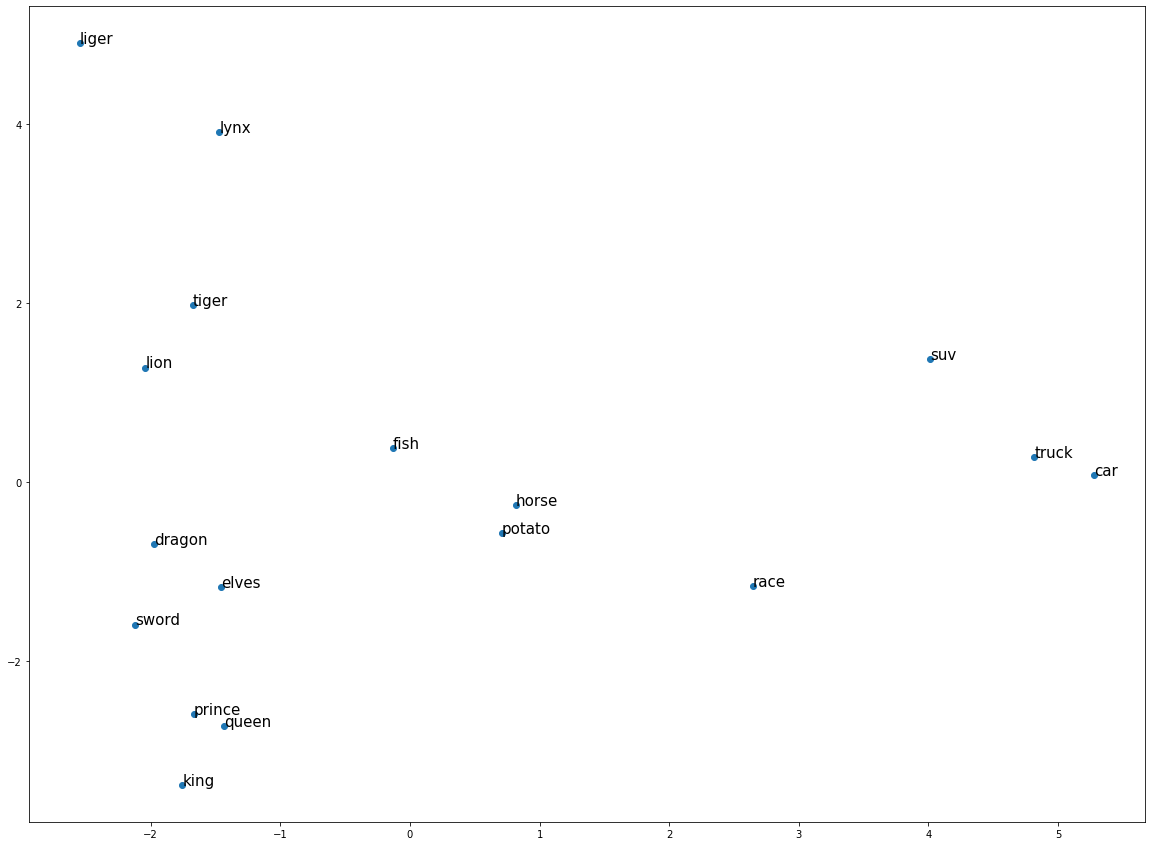

In [63]:
# create a nice big plot 
plt.figure(figsize=(20,15))

# plot the scatter plot of where the words will be
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size= 15)

# show the plot
plt.show()

## Follow Along
### Extract Document Vectors

Let's see how much the quality of our query will work when we try a new embedding model.

Steps:
* Extract Vectors from Each Document
* Search using KNN


In [70]:
X = [nlp(str(d)).vector for d in data]

In [72]:
pd.DataFrame(X).shape

(401, 300)

## Challenge

You will extract word embeddings from documents using Spacy's pre-trained model in the upcoming module project. 

# Review
For your module project assignment you will create vector representations of indeed.com Data Science job listings. You will then estimate a similarity model to perform searches for job descriptions. Get started with your [module project here](./LS_DS_412_Vector_Representations_Assignment.ipynb)

# Sources

* Spacy 101 - https://course.spacy.io
* NLTK Book - https://www.nltk.org/book/
* An Introduction to Information Retrieval - https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf